# 排序

## 常用排序  
- 冒泡排序、插入排序、选择排序、归并排序、快速排序、计数排序、基数排序、桶排序
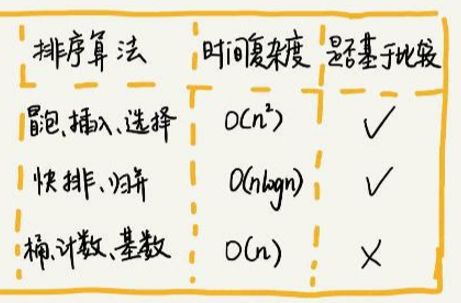

## 如何分析一个“排序算法”？
- 排序算法的执行效率  

1.最好情况、最坏情况、平均情况时间复杂度  
> 要知道排序算法在不同数据下的性能表现，有的接近有序，有的完全无序。  

2.时间复杂度的系数、常数、低阶  
> 规模很小的数据，在对同一阶时间复杂度的排序算法性能对比的时候，就要把系 数、常数、低阶也考虑进来  

3.比较次数和交换次数  
> 基于比较的排序算法的执行过程，会涉及两种操作，一种是元素比较大小，另一种是元素交换或移动  

- 排序算法的内存消耗  
> 的内存消耗可以通过空间复杂度来衡量  

- 排序算法的稳定性  
> 稳定性，这个概念是说，如果待排序的序列中存在值相等的元素，经过排序之后，相等元素之间原有的先后顺序不变。  


## 冒泡排序(bubble sort)
- 冒泡排序：每次冒泡操作都会对相邻的两个元素进行比较，看是否满足大小关系要求。如果不满足就让它俩互换。一次冒泡会让至少一个元素移动到它应该在的位置，重复n次，就完成了n 个数据的排序工作。    

### 问题
> 1. 冒泡排序是原地排序算法吗？  
冒泡的过程只涉及相邻数据的交换操作，只需要常量级的临时空间，所 以它的空间复杂度为O(1)，是一个原地排序算法。  

> 2. 冒泡排序是稳定的排序算法吗？  
在冒泡排序中，只有交换才可以改变两个元素的前后顺序。为了保证冒 泡排序算法的稳定性，当有相邻的两个元素大小相等的时候，我们不做 交换，相同大小的数据在排序前后不会改变顺序，所以冒泡排序是稳定 的排序算法。  

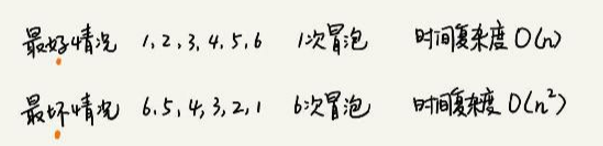

> 3. 冒泡排序的时间复杂度是多少?  
1).最好情况是，要排序的数据已经是有序的了，我们只需要进行一次冒泡 操作，就可以结束了，所以最好情况时间复杂度是$O(n)$。  
2).最坏情况是，要排序的数据刚好是倒序排列的，我们需要进行n次冒泡操作，所以最坏情况时间复杂度为$O(n^2)$。  
3).加权平均时间复杂度，用概率论方法 定量分析平均时间复杂度,通过“有序度”和“逆序度”这两个概念来进行分析。  
有序度是数组中具有有序关系的元素对的个数。有序元素对用数学表达 式表示就是这样：
$有序元素对：a[i] <= a[j], 如果i < j$  
逆序度的定义正好跟有序度相反，逆序度=满有序度-有序。排序的过程就是一种增加有序度，减少逆序度的过程，最后达到满有序度，就说明排序完成了  

>> 对于包含n个数据的数组进行冒泡排序，平均交换次数是多少呢？最坏情况下，初始状态的有序度是0，所以要进行$n*(n-1)/2$次交换。最好情况下，初始状态的有序度是$n*(n-1)/2$，就不需要进行交换。我们可以取个中间值$n*(n-1)/4$，来表示初始有序度既不是很高也不是很低的平均情况。

>> 换句话说，平均情况下，需要$n*(n-1)/4$次交换操作，比较操作肯定要比 交换操作多，而复杂度的上限是$O(n^2)$，所以平均情况下的时间复杂度就是$O(n^2)$。

In [8]:
# 冒泡排序: 将list里的元素从小到排序
from typing import List
def bubble_sort(a: List[int]):
    length = len(a)
    if length <= 1:
        return
    
    for i in range(length):
        made_swap = False
        for j in range(length -i -1):
            if a[j] > a[j + 1]:
                a[j], a[j+1] = a[j+1], a[j]    
                made_swap = True
        if not made_swap:    # 遍历一次未排序的元素，没有产生交换操作就说明已经完成了，就退出排序
            break
            
l = [6,5,4,3,2,1]
bubble_sort(l)
l

[1, 2, 3, 4, 5, 6]

## 插入排序(insertion sort)
- 将元素逐个插入进数组
- 包含两种操作，一种是元素的比较，一种是元素的移动。

### 问题
>第一，插入排序是原地排序算法吗？  
从实现过程可以很明显地看出，插入排序算法的运行并不需要额外的存 储空间，所以空间复杂度是$O(1)$，也就是说，这是一个原地排序算法。  

>第二，插入排序是稳定的排序算法吗？  
在插入排序中，对于值相同的元素，我们可以选择将后面出现的元素， 插入到前面出现元素的后面，这样就可以保持原有的前后顺序不变，所 以插入排序是稳定的排序算法。  

>第三，插入排序的时间复杂度是多少？  
>>如果要排序的数据已经是有序的，我们并不需要搬移任何数据。如果我 们从尾到头在有序数据组里面查找插入位置，每次只需要比较一个数据 就能确定插入的位置。所以这种情况下，最好是时间复杂度为$O(n)$。注 意，这里是从尾到头遍历已经有序的数据。   

>>如果数组是倒序的，每次插入都相当于在数组的第一个位置插入新的数 据，所以需要移动大量的数据，所以最坏情况时间复杂度为$O(n^2)$。  

>>还记得我们在数组中插入一个数据的平均时间复杂度是多少吗？没错， 是$O(n)$。所以，对于插入排序来说，每次插入操作都相当于在数组中插 入一个数据，循环执行n次插入操作，所以平均时间复杂度为$O(n2)$。  

In [7]:
# 插入排序：将list里元素使用插入排序算法，从小到大排序
# 默认a[0]为已排序区，其他为非排序区
def insertion_sort(a: List[int]):
    length = len(a)
    if length <= 1:
        return

    for i in range(1, length):
        value = a[i]
        j = i - 1
        while j >= 0 and a[j] > value:   # 要插入元素比前面元素(已排序区)小，就把插入元素赋值给前面；直到遍历完已排序区，停止赋值，完成该元素插入
            a[j + 1] = a[j]
            j -= 1
        a[j + 1] = value

l = [3, 5, 1, 4, 2, 6]
insertion_sort(l)
l

[1, 2, 3, 4, 5, 6]

## 选择排序(selection sort)
- 分已排序区间和未排序 区间。但是选择排序每次会从未排序区间中找到最小的元素，将其放到已排序区间的末尾。

### 问题
>第一，插入排序是原地排序算法吗？   
选择排序算法的运行并不需要额外的存储空间，所以空间复杂度是$O(1)$，也就是说，这是一个原地排序算法。  

>第二，插入排序是稳定的排序算法吗？    
选择排序每次都要找剩余未排序元素中的最小 值，并和前面的元素交换位置，这样破坏了稳定性，所以选择排序不是稳定的排序算法。  

>第三，插入排序的时间复杂度是多少？   
 因为初始数组都看做是未排序区间内，无论是最好情况和最差情况都是要两两比较出最小元素，指导未排序区间为1个，所以每个元素都要进行n次比较，所以最好情况时间复杂度、最差情况时间复杂度、平均情况时间复杂度是一样的，都是$O(n^2)$  

## 案例
1. 要给电商交易系统中的“订单”排序。订单有两个属 ，一个是下单时间，另一个是订单金额，按照金额从小到大对订单数据排序。对于金额相同的订单，按照下单时间从早到晚有序。对于这样一个排序需求，怎么来做呢？  

答：  
方法：借助稳定排序算法，先按照下单时间给订单排序。排序完成之后，用稳定排序算法，按照订单金额重新排序。两遍排序之后，得到的订单数据就是按照金额从小到大排序，金额相同的订单按照下单时间从早到晚排序的。  

原理：稳定排序算法可以保持金额相同的两个对象，在排序之后的前后顺序不变。第一次排序之后，所有的订单按照下单时间从早到晚有序了。在第二次排序中，我们用的是稳定的排序算法，所以经过第二次排序之后，相同金额的订单仍然保持下单时间从早到晚有序。
